In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
covid = pd.read_csv('time_series_covid19_confirmed_global.csv')

In [4]:
covid.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37894,37953,37999,38054,38070,38113,38129,38140,38143,38162
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,8119,8275,8427,8605,8759,8927,9083,9195,9279,9380
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,40667,41068,41460,41858,42228,42619,43016,43403,43781,44146
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1045,1045,1045,1060,1060,1098,1098,1124,1124,1124
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2068,2134,2171,2222,2283,2332,2415,2471,2551,2624


In [5]:
covid.shape

(266, 226)

In [6]:
covid.drop(["Lat", "Long"], axis = 1, inplace = True)

In [7]:
covid.head(10)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,37894,37953,37999,38054,38070,38113,38129,38140,38143,38162
1,NaN,Albania,0,0,0,0,0,0,0,0,...,8119,8275,8427,8605,8759,8927,9083,9195,9279,9380
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,40667,41068,41460,41858,42228,42619,43016,43403,43781,44146
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,1045,1045,1045,1060,1060,1098,1098,1124,1124,1124
4,NaN,Angola,0,0,0,0,0,0,0,0,...,2068,2134,2171,2222,2283,2332,2415,2471,2551,2624
5,NaN,Antigua and Barbuda,0,0,0,0,0,0,0,0,...,94,94,94,94,94,94,94,94,94,94
6,NaN,Argentina,0,0,0,0,0,0,0,0,...,329043,336802,342154,350867,359638,370188,380292,392009,401239,408426
7,NaN,Armenia,0,0,0,0,0,0,0,0,...,42477,42616,42792,42825,42936,43067,43270,43451,43626,43750
8,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,113,113
9,New South Wales,Australia,0,0,0,0,3,4,4,4,...,3981,3985,3988,3991,3997,4006,4019,4033,4040,4050


In [8]:
cov_agg = covid.groupby('Country/Region').sum()

In [9]:
cov_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,37894,37953,37999,38054,38070,38113,38129,38140,38143,38162
Albania,0,0,0,0,0,0,0,0,0,0,...,8119,8275,8427,8605,8759,8927,9083,9195,9279,9380
Algeria,0,0,0,0,0,0,0,0,0,0,...,40667,41068,41460,41858,42228,42619,43016,43403,43781,44146
Andorra,0,0,0,0,0,0,0,0,0,0,...,1045,1045,1045,1060,1060,1098,1098,1124,1124,1124
Angola,0,0,0,0,0,0,0,0,0,0,...,2068,2134,2171,2222,2283,2332,2415,2471,2551,2624


In [10]:
cov_agg.shape

(188, 222)

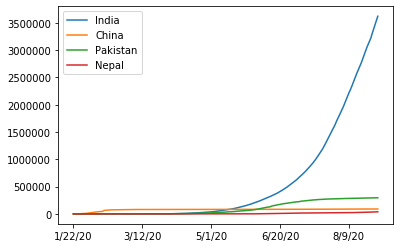

In [11]:
cov_agg.loc['India'].plot()
cov_agg.loc['China'].plot()
cov_agg.loc['Pakistan'].plot()
cov_agg.loc['Nepal'].plot()
plt.legend()

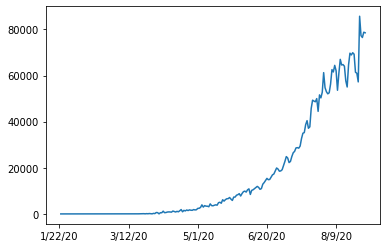

In [12]:
cov_agg.loc['India'].diff().plot()

In [13]:
cov_agg.loc['India'].diff().max()

85687.0

In [15]:
countries = list(cov_agg.index)

In [29]:
max_infect = []

for country in countries:
    max_infect.append(cov_agg.loc[country].diff().max())

In [30]:
for data in max_infect:
    print(data)

915.0
178.0
675.0
79.0
100.0
39.0
11717.0
771.0
716.0
1321.0
590.0
292.0
786.0
4019.0
12.0
973.0
2454.0
94.0
139.0
29.0
2036.0
811.0
262.0
69074.0
26.0
350.0
41.0
106.0
78.0
114.0
31.0
2324.0
2778.0
216.0
83.0
13990.0
15136.0
19001.0
44.0
346.0
414.0
1214.0
430.0
358.0
93.0
58.0
608.0
391.0
99.0
280.0
5.0
2012.0
11536.0
1774.0
449.0
1750.0
31.0
134.0
147.0
1829.0
5.0
267.0
26849.0
570.0
248.0
42.0
6933.0
1513.0
293.0
6.0
4233.0
278.0
156.0
74.0
332.0
3.0
1141.0
292.0
99.0
85687.0
3308.0
3574.0
4576.0
1515.0
2308.0
6557.0
244.0
1762.0
77.0
18757.0
960.0
851.0
695.0
1073.0
11505.0
3.0
48.0
689.0
98.0
45.0
572.0
21.0
90.0
234.0
7.0
614.0
257.0
277.0
215.0
81.0
94.0
227.0
41.0
9556.0
626.0
12.0
56.0
678.0
1776.0
142.0
316.0
1221.0
1346.0
89.0
480.0
69.0
790.0
240.0
386.0
2164.0
12073.0
1540.0
73.0
719.0
21358.0
6725.0
903.0
1516.0
2355.0
1504.0
11656.0
231.0
5.0
6.0
7.0
54.0
151.0
4919.0
207.0
878.0
50.0
86.0
1426.0
123.0
70.0
97.0
13944.0
323.0
19382.0
300.0
410.0
139.0
1698.0
1321.0
105.

In [31]:
cov_agg['max_infection_rate'] = max_infect

In [32]:
cov_agg.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,37953,37999,38054,38070,38113,38129,38140,38143,38162,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,8275,8427,8605,8759,8927,9083,9195,9279,9380,178.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,41068,41460,41858,42228,42619,43016,43403,43781,44146,675.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,1045,1045,1060,1060,1098,1098,1124,1124,1124,79.0
Angola,0,0,0,0,0,0,0,0,0,0,...,2134,2171,2222,2283,2332,2415,2471,2551,2624,100.0
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,94,94,94,94,94,94,94,94,94,39.0
Argentina,0,0,0,0,0,0,0,0,0,0,...,336802,342154,350867,359638,370188,380292,392009,401239,408426,11717.0
Armenia,0,0,0,0,0,0,0,0,0,0,...,42616,42792,42825,42936,43067,43270,43451,43626,43750,771.0
Australia,0,0,0,0,4,5,5,6,9,9,...,24811,24915,25053,25204,25322,25448,25547,25670,25746,716.0


In [45]:
corona_data = pd.DataFrame(cov_agg['max_infection_rate'])

In [46]:
corona_data.head(10)

,max_infection_rate
Country/Region,
Afghanistan,915.0
Albania,178.0
Algeria,675.0
Andorra,79.0
Angola,100.0
Antigua and Barbuda,39.0
Argentina,11717.0
Armenia,771.0
Australia,716.0


In [47]:
corona_data.shape

(188, 1)

In [48]:
happy_data = pd.read_csv('happiness_2019.csv')
happy_data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [49]:
happy_data.drop(['Overall rank', 'Perceptions of corruption'], axis = 1, inplace = True)

In [50]:
happy_data.set_index('Country or region', inplace = True)
happy_data.head(10)

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
Country or region,,,,,,
Finland,7.769,1.340,1.587,0.986,0.596,0.153
Denmark,7.600,1.383,1.573,0.996,0.592,0.252
Norway,7.554,1.488,1.582,1.028,0.603,0.271
Iceland,7.494,1.380,1.624,1.026,0.591,0.354
Netherlands,7.488,1.396,1.522,0.999,0.557,0.322
Switzerland,7.480,1.452,1.526,1.052,0.572,0.263
Sweden,7.343,1.387,1.487,1.009,0.574,0.267
New Zealand,7.307,1.303,1.557,1.026,0.585,0.330
Canada,7.278,1.365,1.505,1.039,0.584,0.285


In [51]:
happy_data.shape

(156, 6)

In [52]:
merge_data = corona_data.join(happy_data, how = "inner")

In [53]:
merge_data.head()

,max_infection_rate,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
Afghanistan,915.0,3.203,0.350,0.517,0.361,0.000,0.158
Albania,178.0,4.719,0.947,0.848,0.874,0.383,0.178
Algeria,675.0,5.211,1.002,1.160,0.785,0.086,0.073
Argentina,11717.0,6.086,1.092,1.432,0.881,0.471,0.066
Armenia,771.0,4.559,0.850,1.055,0.815,0.283,0.095


In [54]:
merge_data.corr()

,max_infection_rate,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
max_infection_rate,1.000000,0.064912,0.091766,0.051704,0.082681,0.086952,-0.114501
Score,0.064912,1.000000,0.795413,0.784094,0.801891,0.585119,0.097775
GDP per capita,0.091766,0.795413,1.000000,0.757521,0.859431,0.394799,-0.097441
Social support,0.051704,0.784094,0.757521,1.000000,0.751632,0.456317,-0.060586
Healthy life expectancy,0.082681,0.801891,0.859431,0.751632,1.000000,0.423146,-0.052984
Freedom to make life choices,0.086952,0.585119,0.394799,0.456317,0.423146,1.000000,0.259240
Generosity,-0.114501,0.097775,-0.097441,-0.060586,-0.052984,0.259240,1.000000


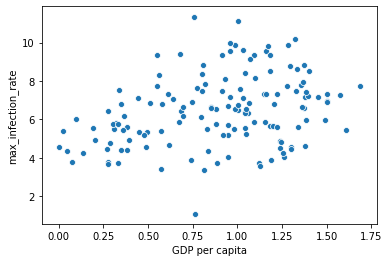

In [62]:
x = merge_data["GDP per capita"]
y = merge_data["max_infection_rate"]

# sns.scatterplot(x, y)
sns.scatterplot(x, np.log(y))

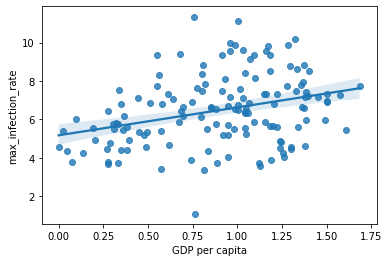

In [59]:
sns.regplot(x, np.log(y))